<a href="https://colab.research.google.com/github/pierobadano/Desafio-TelecomX-P1/blob/main/Desafio_Telecom_p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio Telecom X

En el siguiente notebook iré realizando mi codigo resolviendo el "Desafio Telecom X", aplicando todos los conocimientos aprendidos durante mi formacion como analista de datos hasta el momento

# Contexto

He sido contratado como asistente de análisis de datos en Telecom X y formare parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Mi desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

```
Diccionario de datos
customerID: número de identificación único de cada cliente
Churn: si el cliente dejó o no la empresa
gender: género (masculino y femenino)
SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
Partner: si el cliente tiene o no una pareja
Dependents: si el cliente tiene o no dependientes
tenure: meses de contrato del cliente
PhoneService: suscripción al servicio telefónico
MultipleLines: suscripción a más de una línea telefónica
InternetService: suscripción a un proveedor de internet
OnlineSecurity: suscripción adicional de seguridad en línea
OnlineBackup: suscripción adicional de respaldo en línea
DeviceProtection: suscripción adicional de protección del dispositivo
TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
StreamingTV: suscripción de televisión por cable
StreamingMovies: suscripción de streaming de películas
Contract: tipo de contrato
PaperlessBilling: si el cliente prefiere recibir la factura en línea
PaymentMethod: forma de pago
Charges.Monthly: total de todos los servicios del cliente por mes
Charges.Total: total gastado por el cliente

```




# Desarrollo

In [7]:
import pandas as pd
import numpy as np


In [8]:
url="https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
datos_crudos=pd.read_json(url)
df_clientes= pd.json_normalize(datos_crudos["customer"])

In [9]:
df_clientes= pd.json_normalize(datos_crudos["customer"])
df_telefono= pd.json_normalize(datos_crudos["phone"])
df_internet= pd.json_normalize(datos_crudos["internet"])
df_account= pd.json_normalize(datos_crudos["account"])


In [10]:
datos= pd.concat([datos_crudos[["customerID","Churn"]],df_clientes,df_telefono,df_internet,df_account], axis=1)

In [11]:
datos.sample(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
6005,8205-MQUGY,No,Male,0,Yes,Yes,12,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,49.20,571.15
1358,1963-VAUKV,Yes,Female,0,No,No,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,20.4
6242,8591-NXRCV,No,Female,0,No,No,41,Yes,Yes,DSL,...,No,Yes,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),74.65,3090.65
4512,6180-YBIQI,No,Male,0,No,No,5,No,No phone service,DSL,...,No,No,No,No,No,Month-to-month,No,Mailed check,24.30,100.2
6926,9541-ZPSEA,No,Male,0,Yes,Yes,68,Yes,No,Fiber optic,...,No,Yes,No,No,No,Two year,No,Credit card (automatic),80.35,5375.15
6483,8908-SLFCJ,No,Female,0,No,No,21,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),20.85,435.25
5393,7369-TRPFD,No,Male,0,No,No,19,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,18.80,279.2
5843,7994-UYIVZ,No,Male,0,Yes,No,8,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),85.65,659.45
501,0708-LGSMF,No,Male,0,Yes,No,13,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,65.85,902.25
4350,5968-XQIVE,No,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,No,No,Yes,No,One year,Yes,Electronic check,89.70,6588.95


In [12]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [14]:
datos["customerID"].duplicated().sum()

np.int64(0)

In [15]:
for col in datos.columns:
  print(col)
  print(datos[col].unique())

customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn
['No' 'Yes' '']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['Yes' 'No']
tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
PhoneService
['Yes' 'No']
MultipleLines
['No' 'Yes' 'No phone service']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['Yes' 'No' 'No internet service']
StreamingTV
['Yes' 'No' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['One year' 'Month-to-month' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Mailed check' 'Electronic check' 'Credit card (automati

In [55]:
datos['churn'].replace(" ","")

,churn
0,0
1,0
2,1
3,1
4,1
...,...
7262,0
7263,1
7264,0
7265,0


In [56]:
datos["churn"].unique()

array([0, 1, ''], dtype=object)

In [16]:
datos[["OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]]=datos[["OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]].replace("No internet service","No")

In [17]:
datos["MultipleLines"]=datos["MultipleLines"].replace("No phone service","No")

In [18]:
datos[["Charges.Monthly","Charges.Total"]]

,Charges.Monthly,Charges.Total
0,65.60,593.3
1,59.90,542.4
2,73.90,280.85
3,98.00,1237.85
4,83.90,267.4
...,...,...
7262,55.15,742.9
7263,85.10,1873.7
7264,50.30,92.75
7265,67.85,4627.65


In [19]:
datos.columns=datos.columns.str.lower()

In [20]:
datos.columns=datos.columns.str.replace(".","")


In [44]:
columnas=datos.columns

In [21]:
datos["chargestotal"]=datos["chargestotal"].replace(",",".")

In [22]:
datos["chargestotal"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7267 entries, 0 to 7266
Series name: chargestotal
Non-Null Count  Dtype 
--------------  ----- 
7267 non-null   object
dtypes: object(1)
memory usage: 56.9+ KB


In [23]:
datos["chargestotal"] = datos["chargestotal"].apply(lambda x: x.replace("$","").replace(",","").strip())


https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html#pandas.to_numeric

In [24]:
datos["chargestotal"]=pd.to_numeric(datos["chargestotal"], errors="coerce") #convierto los valores vacios de haber a nan

In [25]:
datos["chargestotal"].dtype

dtype('float64')

In [26]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7267 non-null   object 
 1   churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   seniorcitizen     7267 non-null   int64  
 4   partner           7267 non-null   object 
 5   dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   phoneservice      7267 non-null   object 
 8   multiplelines     7267 non-null   object 
 9   internetservice   7267 non-null   object 
 10  onlinesecurity    7267 non-null   object 
 11  onlinebackup      7267 non-null   object 
 12  deviceprotection  7267 non-null   object 
 13  techsupport       7267 non-null   object 
 14  streamingtv       7267 non-null   object 
 15  streamingmovies   7267 non-null   object 
 16  contract          7267 non-null   object 


In [27]:
datos

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,chargesmonthly,chargestotal
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [28]:
datos["cuentasdiarias"]= (datos["chargesmonthly"]/30).round(4)

In [29]:
datos = datos.replace({"Yes":1,"No":0})
      #pandas me recomienda que utilice .infer_objects para adecuar al mejor tipo de dato automaticamente
datos = datos.infer_objects()

/tmp/ipython-input-184115587.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos = datos.replace({"Yes":1,"No":0})


In [30]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7267 non-null   object 
 1   churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   seniorcitizen     7267 non-null   int64  
 4   partner           7267 non-null   int64  
 5   dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   phoneservice      7267 non-null   int64  
 8   multiplelines     7267 non-null   int64  
 9   internetservice   7267 non-null   object 
 10  onlinesecurity    7267 non-null   int64  
 11  onlinebackup      7267 non-null   int64  
 12  deviceprotection  7267 non-null   int64  
 13  techsupport       7267 non-null   int64  
 14  streamingtv       7267 non-null   int64  
 15  streamingmovies   7267 non-null   int64  
 16  contract          7267 non-null   object 


# Analisis Descriptivo || Carga y analisis

In [31]:
datos[["chargesmonthly","chargestotal","cuentasdiarias"]].describe() #analisis descriptivo media mediana y desviacion estandar

,chargesmonthly,chargestotal,cuentasdiarias
count,7267.000000,7256.000000,7267.000000
mean,64.720098,2280.634213,2.157337
std,30.129572,2268.632997,1.004319
min,18.250000,18.800000,0.608300
25%,35.425000,400.225000,1.180850
50%,70.300000,1391.000000,2.343300
75%,89.875000,3785.300000,2.995850
max,118.750000,8684.800000,3.958300


In [32]:
datos["chargestotal"].isnull().sum()

np.int64(11)

In [33]:
datos[datos['chargestotal'].isna()] #habian valores nulos no detectados, puesto que las celdas estaban ocupadas, con un espacio, por lo que al momento de convetirlas a float con dtype, ocurria error
                                    # al cambiar el dtype con is numeric, convertimos estas celdas en NaN, lo que al analizar los parametros estadisticos, vemos una diferencia en el conteo

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,chargesmonthly,chargestotal,cuentasdiarias
975,1371-DWPAZ,0,Female,0,1,1,0,0,0,DSL,...,1,1,1,0,Two year,0,Credit card (automatic),56.05,NaN,1.8683
1775,2520-SGTTA,0,Female,0,1,1,0,1,0,0,...,0,0,0,0,Two year,0,Mailed check,20.00,NaN,0.6667
1955,2775-SEFEE,0,Male,0,0,1,0,1,1,DSL,...,0,1,0,0,Two year,1,Bank transfer (automatic),61.90,NaN,2.0633
2075,2923-ARZLG,0,Male,0,1,1,0,1,0,0,...,0,0,0,0,One year,1,Mailed check,19.70,NaN,0.6567
2232,3115-CZMZD,0,Male,0,0,1,0,1,0,0,...,0,0,0,0,Two year,0,Mailed check,20.25,NaN,0.6750
2308,3213-VVOLG,0,Male,0,1,1,0,1,1,0,...,0,0,0,0,Two year,0,Mailed check,25.35,NaN,0.8450
2930,4075-WKNIU,0,Female,0,1,1,0,1,1,DSL,...,1,1,1,0,Two year,0,Mailed check,73.35,NaN,2.4450
3134,4367-NUYAO,0,Male,0,1,1,0,1,1,0,...,0,0,0,0,Two year,0,Mailed check,25.75,NaN,0.8583
3203,4472-LVYGI,0,Female,0,1,1,0,0,0,DSL,...,1,1,1,0,Two year,1,Bank transfer (automatic),52.55,NaN,1.7517
4169,5709-LVOEQ,0,Female,0,1,1,0,1,0,DSL,...,1,0,1,1,Two year,0,Mailed check,80.85,NaN,2.6950


In [34]:
datos[datos['tenure']==0] #los datos nulos corresponden a clientes que estan hace poco tiempo en la empresa (tenure 0),
                          #esto tiene sentido porque no tienen un cargo total aplicado, por lo que siguen siendo registros valiosos, la funcion describe ignora los valores Nan, no afectan a los calculos

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,chargesmonthly,chargestotal,cuentasdiarias
975,1371-DWPAZ,0,Female,0,1,1,0,0,0,DSL,...,1,1,1,0,Two year,0,Credit card (automatic),56.05,NaN,1.8683
1775,2520-SGTTA,0,Female,0,1,1,0,1,0,0,...,0,0,0,0,Two year,0,Mailed check,20.00,NaN,0.6667
1955,2775-SEFEE,0,Male,0,0,1,0,1,1,DSL,...,0,1,0,0,Two year,1,Bank transfer (automatic),61.90,NaN,2.0633
2075,2923-ARZLG,0,Male,0,1,1,0,1,0,0,...,0,0,0,0,One year,1,Mailed check,19.70,NaN,0.6567
2232,3115-CZMZD,0,Male,0,0,1,0,1,0,0,...,0,0,0,0,Two year,0,Mailed check,20.25,NaN,0.6750
2308,3213-VVOLG,0,Male,0,1,1,0,1,1,0,...,0,0,0,0,Two year,0,Mailed check,25.35,NaN,0.8450
2930,4075-WKNIU,0,Female,0,1,1,0,1,1,DSL,...,1,1,1,0,Two year,0,Mailed check,73.35,NaN,2.4450
3134,4367-NUYAO,0,Male,0,1,1,0,1,1,0,...,0,0,0,0,Two year,0,Mailed check,25.75,NaN,0.8583
3203,4472-LVYGI,0,Female,0,1,1,0,0,0,DSL,...,1,1,1,0,Two year,1,Bank transfer (automatic),52.55,NaN,1.7517
4169,5709-LVOEQ,0,Female,0,1,1,0,1,0,DSL,...,1,0,1,1,Two year,0,Mailed check,80.85,NaN,2.6950


In [41]:
datos[datos['tenure'] > 0]['chargestotal'].describe()

,chargestotal
count,7256.000000
mean,2280.634213
std,2268.632997
min,18.800000
25%,400.225000
50%,1391.000000
75%,3785.300000
max,8684.800000


In [45]:
datos[columnas].describe().round(4)

,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,chargesmonthly,chargestotal,cuentasdiarias
count,7267.0000,7267.0000,7267.0000,7267.0000,7267.0000,7267.0000,7267.0000,7267.0000,7267.0000,7267.0000,7267.0000,7267.0000,7267.0000,7267.0000,7256.0000,7267.0000
mean,0.1627,0.4841,0.3001,32.3465,0.9027,0.4218,0.2860,0.3446,0.3428,0.2895,0.3839,0.3875,0.5932,64.7201,2280.6342,2.1573
std,0.3691,0.4998,0.4583,24.5718,0.2964,0.4939,0.4519,0.4753,0.4747,0.4536,0.4864,0.4872,0.4913,30.1296,2268.6330,1.0043
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,18.2500,18.8000,0.6083
25%,0.0000,0.0000,0.0000,9.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,35.4250,400.2250,1.1808
50%,0.0000,0.0000,0.0000,29.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,70.3000,1391.0000,2.3433
75%,0.0000,1.0000,1.0000,55.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,89.8750,3785.3000,2.9958
max,1.0000,1.0000,1.0000,72.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,118.7500,8684.8000,3.9583


```
En promedio, nuestros clientes tienen 32.34 meses de antigüedad.
El 48.41% de los clientes está en pareja, y el 30% tiene dependientes (sobre el total de clientes).
Respecto a servicios adicionales contratados:
El 90.27% del total cuenta con servicio telefónico, lo que lo convierte en el servicio más común.
El 42.18% tiene más de una línea telefónica.
El 28.6% contrató seguridad en línea,
El 34.46% contrató respaldo de información en línea,
El 28.95% contrató servicio de soporte técnico,
El 34.28% contrató protección del dispositivo.
Solo el 16.27% son clientes mayores de 65 años (senior citizen).
El cargo mensual promedio es $64.72, mientras que la mediana es $70.3, lo que indica que la mitad de los clientes
paga menos y la otra mitad más que ese valor.
El cargo total promedio por cliente es $2,280.63, con una mediana de $1,391.
El gasto diario promedio es $2.16, y la mediana es $2.34.
Los valores de desviación estándar son altos en relación con sus medias,
 lo que indica una amplia dispersión en los datos, reflejando la diversidad del comportamiento de los clientes.
```


In [39]:
Diccionario de datos
customerID: número de identificación único de cada cliente
Churn: si el cliente dejó o no la empresa
gender: género (masculino y femenino)
SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
Partner: si el cliente tiene o no una pareja
Dependents: si el cliente tiene o no dependientes
tenure: meses de contrato del cliente
PhoneService: suscripción al servicio telefónico
MultipleLines: suscripción a más de una línea telefónica
InternetService: suscripción a un proveedor de internet
OnlineSecurity: suscripción adicional de seguridad en línea
OnlineBackup: suscripción adicional de respaldo en línea
DeviceProtection: suscripción adicional de protección del dispositivo
TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
StreamingTV: suscripción de televisión por cable
StreamingMovies: suscripción de streaming de películas
Contract: tipo de contrato
PaperlessBilling: si el cliente prefiere recibir la factura en línea
PaymentMethod: forma de pago
Charges.Monthly: total de todos los servicios del cliente por mes
Charges.Total: total gastado por el cliente

SyntaxError: invalid syntax (ipython-input-2493677361.py, line 1)

In [46]:
import matplotlib.pyplot as plt


TypeError: cannot unpack non-iterable Axes object

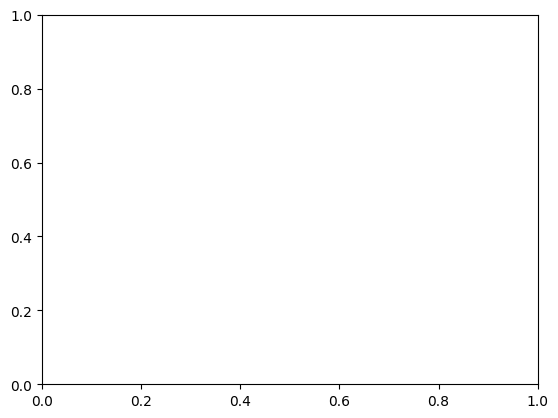

In [49]:
fig, ax = plt.subplots()
ax.pie(datos["churn"].value_counts(), labels=datos["churn"].value_counts().index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Churn Distribution')
plt.show()

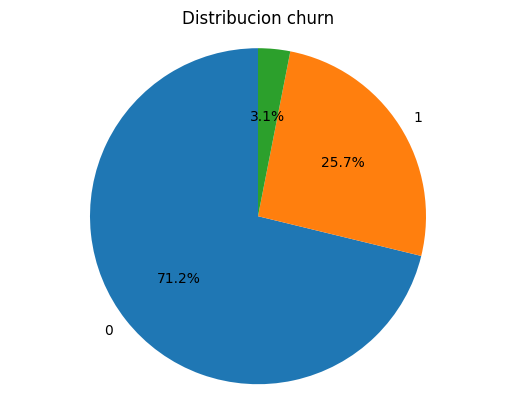

In [53]:
fig, ax = plt.subplots() # Esta línea crea una figura (el "lienzo" donde irá el gráfico) y un eje (el área donde se dibuja el gráfico). Es necesaria para poder dibujar el gráfico.

ax.pie(datos["churn"].value_counts(), # Esta es la parte más importante para el gráfico de torta. Le estás pasando los datos que quieres visualizar. `datos["churn"].value_counts()` calcula cuántas veces aparece cada valor único en la columna 'churn' (por ejemplo, cuántos 'Yes' y cuántos 'No'). Esto es lo que se representará en el gráfico.
       labels=datos["churn"].value_counts().index, # Esto asigna las etiquetas a cada porción del gráfico. En este caso, serán los valores únicos de la columna 'churn' ('Yes' y 'No').
       autopct='%1.1f%%', # Esto formatea el porcentaje que se mostrará en cada porción del gráfico. `%1.1f%%` significa que se mostrará un número flotante con un decimal seguido del símbolo de porcentaje.
       startangle=90) # Esto define el ángulo con el que comienza la primera porción del gráfico. 90 grados a menudo se usa para que la primera porción comience en la parte superior.

ax.axis('equal')  # Esto asegura que el gráfico de torta se dibuje como un círculo perfecto, no como una elipse. Es muy recomendable usarlo.

plt.title('Distribucion churn') # Esto añade un título al gráfico. Es opcional pero útil para entender de qué trata el gráfico.

plt.show() # Esta línea muestra el gráfico. Es necesaria para que puedas ver la visualización.

In [54]:
datos["churn"].unique()

array([0, 1, ''], dtype=object)